In [5]:
import numpy as np
import numpy.random as random
import matplotlib.pyplot as plt
import tqdm

In [6]:
import importlib

In [7]:
import boards

In [19]:
importlib.reload(boards);

In [20]:
b = boards.LinearBoard(3)


In [21]:
b = boards.LinearBoard(3)
b.board[0]=1
b.board[1]=2
b.board[2]=1
b.board[ b.ij_to_ind(1,0)] = 2
b.board[ b.ij_to_ind(2,0)] = 2
b.board[ b.ij_to_ind(1,1)] = 2
b.board[ b.ij_to_ind(2,1)] = 1
b.board[ b.ij_to_ind(1,2)] = 1
b.board[ b.ij_to_ind(2,2)] = 1
b.printBoard()

    0 1 2 
0  |X 0 X |
1  |0 0 X |
2  |0 X X |


In [22]:
B = boards.LinearBoard(3)
boards.simulate(B.board, B.masks)

(array([1, 1, 1, 1, 2, 2, 1, 2, 2]), 1)

In [25]:
b = boards.LinearBoard(n=4);
w = boards.simulate(b.board, b.masks, max_moves=20)[1]
b.printBoard()
print("winner = ", w)

    0 1 2 3 
0  |0 0 0 0 |
1  |X X X 0 |
2  |X X 0 X |
3  |X X 0 0 |
winner =  2


In [85]:
b = boards.LinearBoard(n=10);
w = boards.simulate(b.board, b.masks, max_moves=20)[1]
b.printBoard()
print("winner = ", w)

    0 1 2 3 4 5 6 7 8 9 
0  |        X       0   |
1  |  X 0     X     X   |
2  |  0 X     0         |
3  |              X     |
4  |        0           |
5  |X X       0         |
6  |  0         X       |
7  |0                   |
8  |            0       |
9  |  X       0         |
winner =  -1


100%|████████████████████████████████████| 10000/10000 [00:11<00:00, 865.73it/s]


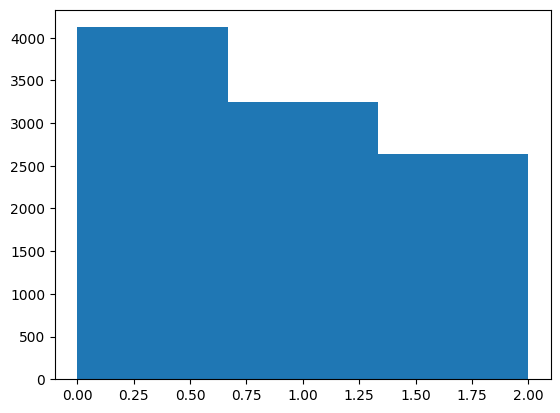

In [98]:
n = 4
B = boards.LinearBoard(n)
stats = [boards.simulate(boards.LinearBoard(n).board, B.masks, max_moves=1000)[1] for _ in tqdm.tqdm(range(10000))]
plt.hist(stats, bins=3);

In [111]:
B = boards.LinearBoard(5);
masks = B.masks
board, _ = boards.simulate(B.board, B.masks, max_moves=3)

In [123]:
moves = boards.getMoves(board)
moves_stats = np.zeros(len(moves))

In [ ]:
f

In [133]:
for iMove in tqdm.tqdm(range(len(moves))):
    bb = board.copy()
    bb[ moves[iMove]] = 1
    boards_collection = np.tile(bb, (1000,1))
    mc = np.apply_along_axis(lambda b: boards.simulate(b, masks, max_moves=100)[1], 1, boards_collection)
    moves_stats[iMove] = np.mean(mc==1)

100%|███████████████████████████████████████████| 22/22 [00:34<00:00,  1.56s/it]


In [136]:
best_move = np.argmax(moves_stats)
best_move

17

In [ ]:
board[best_move] = 1;
moves = boards.getMoves(board)
moves_stats = np.zeros(len(moves))

In [137]:
for iMove in tqdm.tqdm(range(len(moves))):
    bb = board.copy()
    bb[ moves[iMove]] = 1
    boards_collection = np.tile(bb, (1000,1))
    mc = np.apply_along_axis(lambda b: boards.simulate(b, masks, player_to_move=2, max_moves=100)[1], 1, boards_collection)
    moves_stats[iMove] = np.mean(mc==2)

100%|███████████████████████████████████████████| 22/22 [00:34<00:00,  1.59s/it]


In [138]:
best_move = np.argmax(moves_stats)
best_move

15

In [139]:
board[best_move] = 2;
moves = boards.getMoves(board)
moves_stats = np.zeros(len(moves))

In [137]:
for iMove in tqdm.tqdm(range(len(moves))):
    bb = board.copy()
    bb[ moves[iMove]] = 1
    boards_collection = np.tile(bb, (1000,1))
    mc = np.apply_along_axis(lambda b: boards.simulate(b, masks, player_to_move=2, max_moves=100)[1], 1, boards_collection)
    moves_stats[iMove] = np.mean(mc==2)

100%|███████████████████████████████████████████| 22/22 [00:34<00:00,  1.59s/it]
